## For futher work we need dlib and face_recognition libraries. To install dlib download a file from https://amitdhanawade.com/ytc_08_pcv_03-sfrie-knsdjighfvow4385hkjn34o/, write the way to its file as in the cell below and finally install face_reconition through pip

In [1]:
%%cmd
pip install "C:\Users\Kirill\Downloads\dlib-19.24.1-cp311-cp311-win_amd64.whl"

Microsoft Windows [Version 10.0.19045.4529]
(c) ��௮��� �������� (Microsoft Corporation). �� �ࠢ� ���饭�.

C:\Users\Kirill\Coursework_3rd>pip install "C:\Users\Kirill\Downloads\dlib-19.24.1-cp311-cp311-win_amd64.whl"
Processing c:\users\kirill\downloads\dlib-19.24.1-cp311-cp311-win_amd64.whl
dlib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



C:\Users\Kirill\Coursework_3rd>

In [2]:
%%cmd
pip install face_recognition

Microsoft Windows [Version 10.0.19045.4529]
(c) ��௮��� �������� (Microsoft Corporation). �� �ࠢ� ���饭�.

C:\Users\Kirill\Coursework_3rd>pip install face_recognition



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



C:\Users\Kirill\Coursework_3rd>

## importing neccessary libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import face_recognition
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

## drawing faces (designed as a callable function)

In [4]:
def draw_faces(df):
    def get_landmarks(image_path):
        image = face_recognition.load_image_file(image_path)
        face_landmarks_list = face_recognition.face_landmarks(image)
        if face_landmarks_list:
            return face_landmarks_list[0]
        return None
    
    def normalize_coordinates(landmarks):
        all_points = np.concatenate(list(landmarks.values()), axis=0)
        min_vals = all_points.min(axis=0)
        max_vals = all_points.max(axis=0)
        range_vals = max_vals - min_vals
        for feature in landmarks:
            landmarks[feature] = (landmarks[feature] - min_vals) / range_vals
        return landmarks
    
    def add_z_dimension(landmarks, z_value=0):
        for feature in landmarks:
            landmarks[feature] = np.array([(point[0], point[1], z_value) for point in landmarks[feature]])
        return landmarks
    
    def create_3d_face(landmarks, ax, scale_factors):
        ax.clear()
        base_points = add_z_dimension(landmarks)
        
        for feature, points in base_points.items():
            if feature in scale_factors:
                center = np.mean(points, axis=0)
                points = (points - center) * scale_factors[feature] + center
                base_points[feature] = points
            
            ax.plot(points[:, 0], points[:, 1], points[:, 2], color='black')
    
        ax.set_xlim(0, 1)
        ax.set_ylim(1, 0)  # Invert the y-axis to make the face upright
        ax.set_zlim(-1, 1)
        ax.view_init(elev=90, azim=-90)
        ax.axis('off')  # Remove the axis
    
    def update_face(scale_factors, ax, label):
        create_3d_face(landmarks, ax, scale_factors)
        ax.text2D(0.5, -0.1, label, transform=ax.transAxes, ha='center', fontsize=12)
    
    # Path to the input image
    image_path = 'face-14.jpg'
    
    # Get facial landmarks
    landmarks = get_landmarks(image_path)
    if landmarks is None:
        raise ValueError("No face found in the image")
    
    # Normalize landmarks to fit within the unit cube
    landmarks = normalize_coordinates(landmarks)
    
    # List of facial features to be mapped
    facial_features = [
        'nose_tip', 'top_lip', 'bottom_lip', 'left_eye', 'right_eye',
        'left_eyebrow', 'right_eyebrow', 'chin', 'nose_bridge',
        'left_eye_top', 'right_eye_top', 'left_eye_bottom', 'right_eye_bottom',
        'left_eye_outer', 'right_eye_outer', 'left_eye_inner', 'right_eye_inner',
        'nose_left', 'nose_right'
    ]
    
    # Function to map dataframe features to face traits
    def map_features_to_face_traits(df_row):
        scale_factors = {}
        for i, feature in enumerate(df_row.index[:-1]):  # Exclude the label column
            if i < len(facial_features):
                scale_factors[facial_features[i]] = df_row[feature]
        return scale_factors
    
    # Define plot size for each face
    face_width = 5
    face_height = 5
    
    # Number of faces
    num_faces = len(df)
    
    # Maximum faces per figure
    max_faces_per_figure = 20
    
    # Calculate number of figures needed
    num_figures = (num_faces + max_faces_per_figure - 1) // max_faces_per_figure
    
    # Create and save multiple figures
    for fig_idx in range(num_figures):
        start_idx = fig_idx * max_faces_per_figure
        end_idx = min(start_idx + max_faces_per_figure, num_faces)
        
        fig, axes = plt.subplots(end_idx - start_idx, 1, subplot_kw={'projection': '3d'}, figsize=(face_width, (end_idx - start_idx) * face_height))
        
        for local_idx in range(start_idx, end_idx):
            ax = axes[local_idx - start_idx]
            scale_factors = map_features_to_face_traits(df.iloc[local_idx])
            label = df.iloc[local_idx]['label']
            update_face(scale_factors, ax, label)
        
        output_path = f'faces_output_column_{fig_idx + 1}.png'
        plt.savefig(output_path, bbox_inches='tight')
        plt.close(fig)


## Examples
## NOTE: 
## 1) Each dataset can contain up to 18 features.
## 2) To make labels under each output, create a column called "label".
## 3) Output will be depicted in separate files whose name start with "faces_output_column_"
## 4) It's important to apply MinMax scaler in range 0.5 and 1
## Iris dataset

In [5]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = ""
df["species"].iloc[:50] = "setosa"
df["species"].iloc[50:101] = "versicolor"
df["species"].iloc[100:] = "virginica"
df

C:\Users\Kirill\AppData\Local\Temp\ipykernel_15488\3521390665.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["species"].iloc[:50] = "setosa"
C:\Users\Kirill\AppData\Local\Temp\ipykernel_15488\3521390665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["species"].iloc[50:101] = "versicolor"
C:\Users\Kirill\AppData\Local\Temp\ipykernel_15488\3521390665.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["species"].iloc[1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
species = df["species"]
df = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']].iloc[:,:4]; df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0.35,1))
df = scaler.fit_transform(df);

df = pd.DataFrame(df)
labels = []
for i in range(len(df)):
    labels.append(str(i) + ' - ' + species[i])
df["label"] = labels
df

,0,1,2,3,label
0,0.494444,0.756250,0.394068,0.377083,0 - setosa
1,0.458333,0.620833,0.394068,0.377083,1 - setosa
2,0.422222,0.675000,0.383051,0.377083,2 - setosa
3,0.404167,0.647917,0.405085,0.377083,3 - setosa
4,0.476389,0.783333,0.394068,0.377083,4 - setosa
...,...,...,...,...,...
145,0.783333,0.620833,0.812712,0.945833,145 - virginica
146,0.711111,0.485417,0.790678,0.837500,146 - virginica
147,0.747222,0.620833,0.812712,0.864583,147 - virginica
148,0.693056,0.729167,0.834746,0.945833,148 - virginica


In [8]:
draw_faces(df)

# Fisher's iris dataset after application of PCA to get 2 features from 4

In [9]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = ""
df["species"].iloc[:50] = "setosa"
df["species"].iloc[50:101] = "versicolor"
df["species"].iloc[100:] = "virginica"

C:\Users\Kirill\AppData\Local\Temp\ipykernel_15488\1539052426.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["species"].iloc[:50] = "setosa"
C:\Users\Kirill\AppData\Local\Temp\ipykernel_15488\1539052426.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["species"].iloc[50:101] = "versicolor"
C:\Users\Kirill\AppData\Local\Temp\ipykernel_15488\1539052426.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["species"].iloc[1

In [10]:
colors = {"setosa": "dimgray", "versicolor": "slategray", "virginica": "darkgray"}
markers = {"setosa": "o", "versicolor": "s", "virginica": "D"}

In [11]:
from sklearn.decomposition import PCA

C:\Users\Kirill\AppData\Local\Temp\ipykernel_15488\581704348.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca["species"].iloc[:50] = "setosa"
C:\Users\Kirill\AppData\Local\Temp\ipykernel_15488\581704348.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca["species"].iloc[50:101] = "versicolor"
C:\Users\Kirill\AppData\Local\Temp\ipykernel_15488\581704348.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pca["species

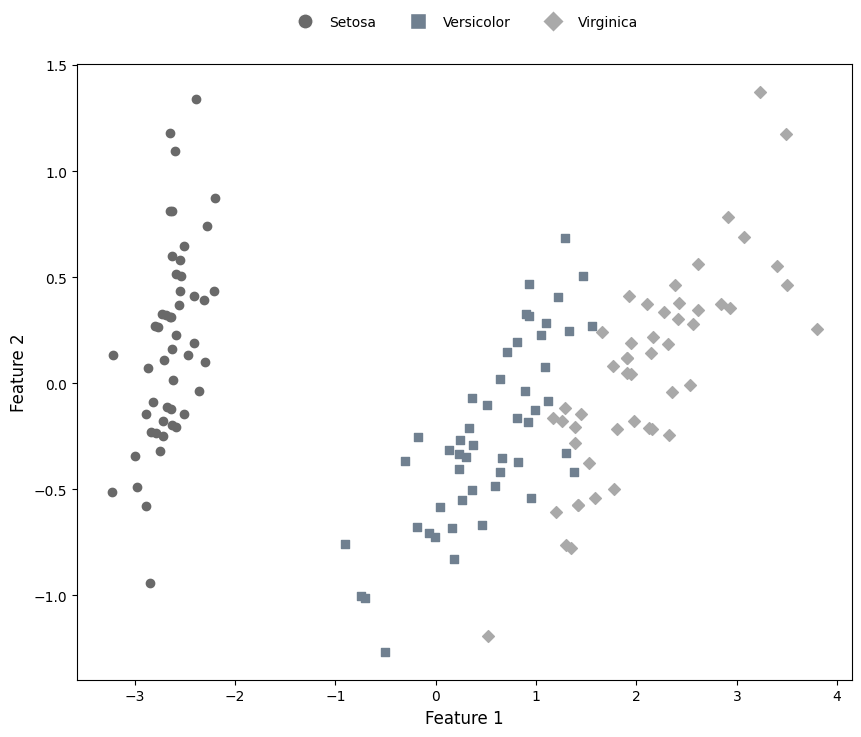

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[iris.feature_names])

df_pca = pd.DataFrame(data=df_pca, columns=["Feature 1", "Feature 2"])
df_pca['species'] = ""
df_pca["species"].iloc[:50] = "setosa"
df_pca["species"].iloc[50:101] = "versicolor"
df_pca["species"].iloc[100:] = "virginica"

fig, scatter_ax = plt.subplots(figsize=(10, 8))
for species in df_pca['species'].unique():
    subset = df_pca[df_pca['species'] == species]
    scatter_ax.scatter(subset['Feature 1'], subset['Feature 2'], label=species, marker=markers[species], c=colors[species])

# text_lines = [
#     "Fisher's Iris dataset:",
#     "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"]

# Specify the text position and alignment
text_x = -3.7  # Adjust the x-coordinate as needed
text_y = -2  # Adjust the y-coordinate as needed
vertical_alignment = 'bottom'  # Adjust as needed ('top', 'center', 'bottom')

font_properties = {
'size': 13,
'weight': 'normal',
'color': 'black'
}
    
    # Add the text
# text = '\n'.join(text_lines)
# scatter_ax.text(text_x, text_y, text, verticalalignment=vertical_alignment, fontdict=font_properties)

custom_legend = [plt.Line2D([0], [0], marker='o', color='w', label='Setosa', markerfacecolor='dimgray', markersize=11),
                     plt.Line2D([0], [0], marker='s', color='w', label='Versicolor', markerfacecolor='slategray', markersize=11),
                     plt.Line2D([0], [0], marker='D', color='w', label='Virginica', markerfacecolor='darkgray', markersize=11)]

# plt.suptitle("PCA implemented to Fisher's Iris dataset ro reduce dimensions from 4 to 2", fontsize=12, y=1)
legend = plt.legend(handles=custom_legend, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(custom_legend), frameon=False)
# for text in legend.get_texts():
#     text.set_fontsize('large')

plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.show()

In [13]:
df_pca

,Feature 1,Feature 2,species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa
...,...,...,...
145,1.944110,0.187532,virginica
146,1.527167,-0.375317,virginica
147,1.764346,0.078859,virginica
148,1.900942,0.116628,virginica


In [14]:
average_values_feature_1 = []
average_values_feature_2 = []
# Average values for setosa
average_values_feature_1.append(df_pca["Feature 1"].iloc[:50].mean())
average_values_feature_2.append(df_pca["Feature 2"].iloc[:50].mean())

# Average values for versicolor
average_values_feature_1.append(df_pca["Feature 1"].iloc[50:100].mean())
average_values_feature_2.append(df_pca["Feature 2"].iloc[50:100].mean())

# Average values for virginica
average_values_feature_1.append(df_pca["Feature 1"].iloc[100:].mean())
average_values_feature_2.append(df_pca["Feature 2"].iloc[100:].mean())

# Creation of dataframe
dict = {"Feature 1": average_values_feature_1, "Feature 2": average_values_feature_2, "label": ["setosa", "versicolor", "virginica"]}
faces = pd.DataFrame(dict)
faces

,Feature 1,Feature 2,label
0,-2.642415,0.190885,setosa
1,0.533207,-0.245550,versicolor
2,2.109209,0.054665,virginica


In [15]:
label = faces["label"]
df_1 = scaler.fit_transform(faces[["Feature 1", "Feature 2"]])
df_1 = pd.DataFrame(df_1)
df_1["label"] = label
df_1

,0,1,label
0,0.35000,1.000000,setosa
1,0.78441,0.350000,versicolor
2,1.00000,0.797122,virginica


In [16]:
df_1.columns

Index([0, 1, 'label'], dtype='object')

# Chernoff faces implemented to Fisher's iris dataset after application of PCA to get 2 features from 4

# I will rewrite the function drawing faces one more time as i need another type of output (not in a separate file)

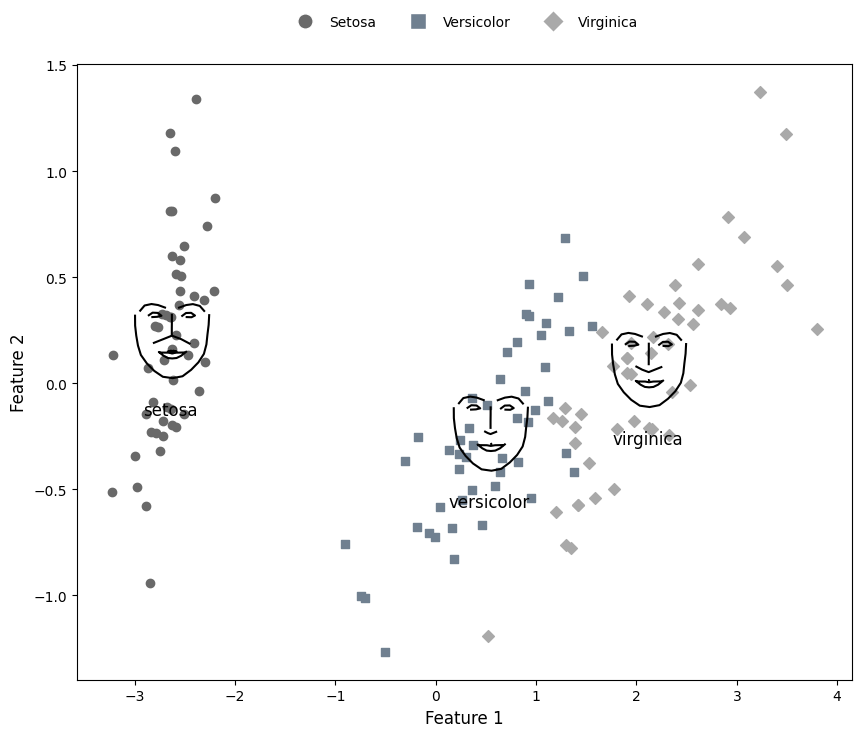

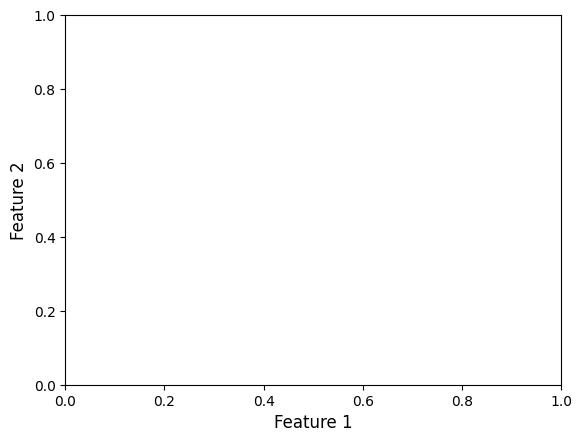

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import face_recognition

# Example DataFrame df_1 with average values per species
df_1 = pd.DataFrame({
    "Feature 1": [-2.684207, -0.310139, 2.261342],
    "Feature 2": [0.319670, -0.018320, -0.949054],
    "species": ["setosa", "versicolor", "virginica"]
})

# Assuming df contains the original Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# PCA transformation
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[iris.feature_names])
df_pca = pd.DataFrame(data=df_pca, columns=["Feature 1", "Feature 2"])
df_pca['species'] = df['species']

# Define a function to get facial landmarks
def get_landmarks(image_path):
    image = face_recognition.load_image_file(image_path)
    face_landmarks_list = face_recognition.face_landmarks(image)
    if face_landmarks_list:
        return face_landmarks_list[0]
    return None

# Define a function to normalize coordinates
def normalize_coordinates(landmarks):
    all_points = np.concatenate(list(landmarks.values()), axis=0)
    min_vals = all_points.min(axis=0)
    max_vals = all_points.max(axis=0)
    range_vals = max_vals - min_vals
    for feature in landmarks:
        landmarks[feature] = (landmarks[feature] - min_vals) / range_vals
    return landmarks

# Define a function to add Z dimension
def add_z_dimension(landmarks, z_value=0):
    for feature in landmarks:
        landmarks[feature] = np.array([(point[0], point[1], z_value) for point in landmarks[feature]])
    return landmarks

# Define a function to create a 3D face
def create_3d_face(landmarks, ax, scale_factors):
    ax.clear()
    ax.set_facecolor((1, 1, 1, 0))
    base_points = add_z_dimension(landmarks)
    
    for feature, points in base_points.items():
        if feature in scale_factors:
            center = np.mean(points, axis=0)
            points = (points - center) * scale_factors[feature] + center
            base_points[feature] = points
        
        ax.plot(points[:, 0], points[:, 1], points[:, 2], color='black')

    ax.set_xlim(0, 1)
    ax.set_ylim(1, 0)  # Invert the y-axis to make the face upright
    ax.set_zlim(-1, 1)
    ax.view_init(elev=90, azim=-90)
    ax.axis('off')  # Remove the axis

# Define a function to update the face
def update_face(scale_factors, ax, label):
    create_3d_face(landmarks, ax, scale_factors)
    ax.text2D(0.5, -0.1, label, transform=ax.transAxes, ha='center', fontsize=12)

# Assume we have a sample face image with facial landmarks
# Here, I use a placeholder path "face_image.jpg"
# You should replace it with the actual path of your sample face image
image_path = 'face-14.jpg'

# Get facial landmarks
landmarks = get_landmarks(image_path)
if landmarks is None:
    raise ValueError("No face found in the image")

# Normalize landmarks to fit within the unit cube
landmarks = normalize_coordinates(landmarks)

# Define the facial features to be mapped
facial_features = [
    'nose_tip', 'top_lip', 'bottom_lip', 'left_eye', 'right_eye',
    'left_eyebrow', 'right_eyebrow', 'chin', 'nose_bridge',
    'left_eye_top', 'right_eye_top', 'left_eye_bottom', 'right_eye_bottom',
    'left_eye_outer', 'right_eye_outer', 'left_eye_inner', 'right_eye_inner',
    'nose_left', 'nose_right'
]

# Define a function to map dataframe features to face traits
def map_features_to_face_traits(df_row):
    scale_factors = {}
    for i, feature in enumerate(df_row.index[:-1]):  # Exclude the label column
        if i < len(facial_features):
            scale_factors[facial_features[i]] = df_row[feature]
    return scale_factors

scatter_ax.set_facecolor((1, 1, 1, 0))
# Overlay Chernoff faces on the scatter plot
for idx in range(len(df_1)):
    scale_factors = map_features_to_face_traits(df_1.iloc[idx])
    label = df_1.iloc[idx]['species']
    
    inset_ax = fig.add_axes([0, 0, 0.3, 0.3], projection='3d')
    position = scatter_ax.transData.transform((faces.iloc[idx]['Feature 1'], faces.iloc[idx]['Feature 2']))
    position = fig.transFigure.inverted().transform(position)
    inset_ax.set_position([position[0] - 0.075, position[1] - 0.075, 0.15, 0.15])
    
    update_face(scale_factors, inset_ax, label)

plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)

fig

# Drawing an initial face from a photo

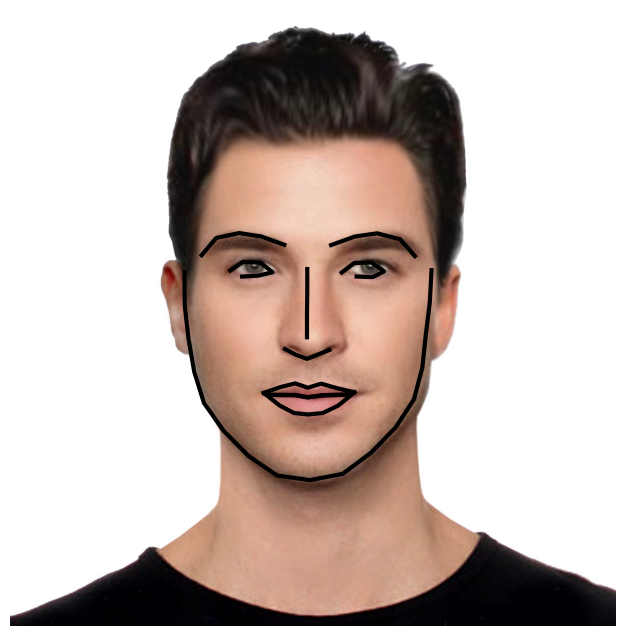

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import face_recognition

# Example DataFrame with average values per species (you can replace this with actual data)
df_1 = pd.DataFrame({
    "Feature 1": [-2.684207, -0.310139, 2.261342],
    "Feature 2": [0.319670, -0.018320, -0.949054],
    "species": ["setosa", "versicolor", "virginica"]
})

# Function to get facial landmarks
def get_landmarks(image_path):
    image = face_recognition.load_image_file(image_path)
    face_landmarks_list = face_recognition.face_landmarks(image)
    if face_landmarks_list:
        return face_landmarks_list[0]
    return None

# Function to normalize coordinates
def normalize_coordinates(landmarks):
    all_points = np.concatenate(list(landmarks.values()), axis=0)
    min_vals = all_points.min(axis=0)
    max_vals = all_points.max(axis=0)
    range_vals = max_vals - min_vals
    for feature in landmarks:
        landmarks[feature] = (landmarks[feature] - min_vals) / range_vals
    return landmarks

# Function to add Z dimension
def add_z_dimension(landmarks, z_value=0):
    for feature in landmarks:
        landmarks[feature] = np.array([(point[0], point[1], z_value) for point in landmarks[feature]])
    return landmarks

# Function to create a 3D face
def create_3d_face(landmarks, ax, scale_factors=None):
    ax.clear()
    ax.set_facecolor((1, 1, 1, 0))  # Set background color to transparent
    base_points = add_z_dimension(landmarks)
    
    for feature, points in base_points.items():
        if scale_factors and feature in scale_factors:
            center = np.mean(points, axis=0)
            points = (points - center) * scale_factors[feature] + center
            base_points[feature] = points
        
        ax.plot(points[:, 0], points[:, 1], points[:, 2], color='black', linewidth = 3)

    ax.set_xlim(0, 1)
    ax.set_ylim(1, 0)  # Invert the y-axis to make the face upright
    ax.set_zlim(-1, 1)
    ax.view_init(elev=90, azim=-90)
    ax.axis('off')  # Remove the axis

# Path to the input image
image_path = 'face-14.jpg'

# Get facial landmarks
landmarks = get_landmarks(image_path)
if landmarks is None:
    raise ValueError("No face found in the image")

# Normalize landmarks to fit within the unit cube
landmarks = normalize_coordinates(landmarks)

# Plot the original image
img = mpimg.imread(image_path)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
ax.axis('off')

# Create an inset for the initial 3D face
inset_ax = fig.add_axes([0.25, 0.19, 0.5, 0.5], projection='3d')  # Adjust position and size as needed
create_3d_face(landmarks, inset_ax)  # No scale_factors to keep it initial

plt.show()
